In [1]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [2]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [3]:
# split data 7/3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values

# Normalize data
mm = MinMaxScaler()
X_ = mm.fit_transform(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, random_state=1234,
                                                   shuffle=True, stratify=y)

<BarContainer object of 139 artists>

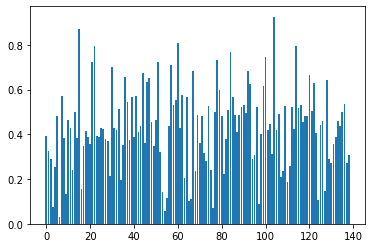

In [4]:
plt.bar(list(range(139)),X_train[0:139,0])

In [5]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 91.66666666666666


In [7]:
# feature importance
fi = rf.feature_importances_
a = [i for i in range(len(fi)) if fi[i] > 0.01]
sg = degs_gene_id[a]
a

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 9,
 13,
 15,
 17,
 28,
 30,
 33,
 36,
 39,
 40,
 41,
 46,
 48,
 50,
 56,
 58,
 64,
 66,
 78,
 84,
 88,
 89,
 90,
 92,
 93,
 95,
 98,
 101]

<BarContainer object of 108 artists>

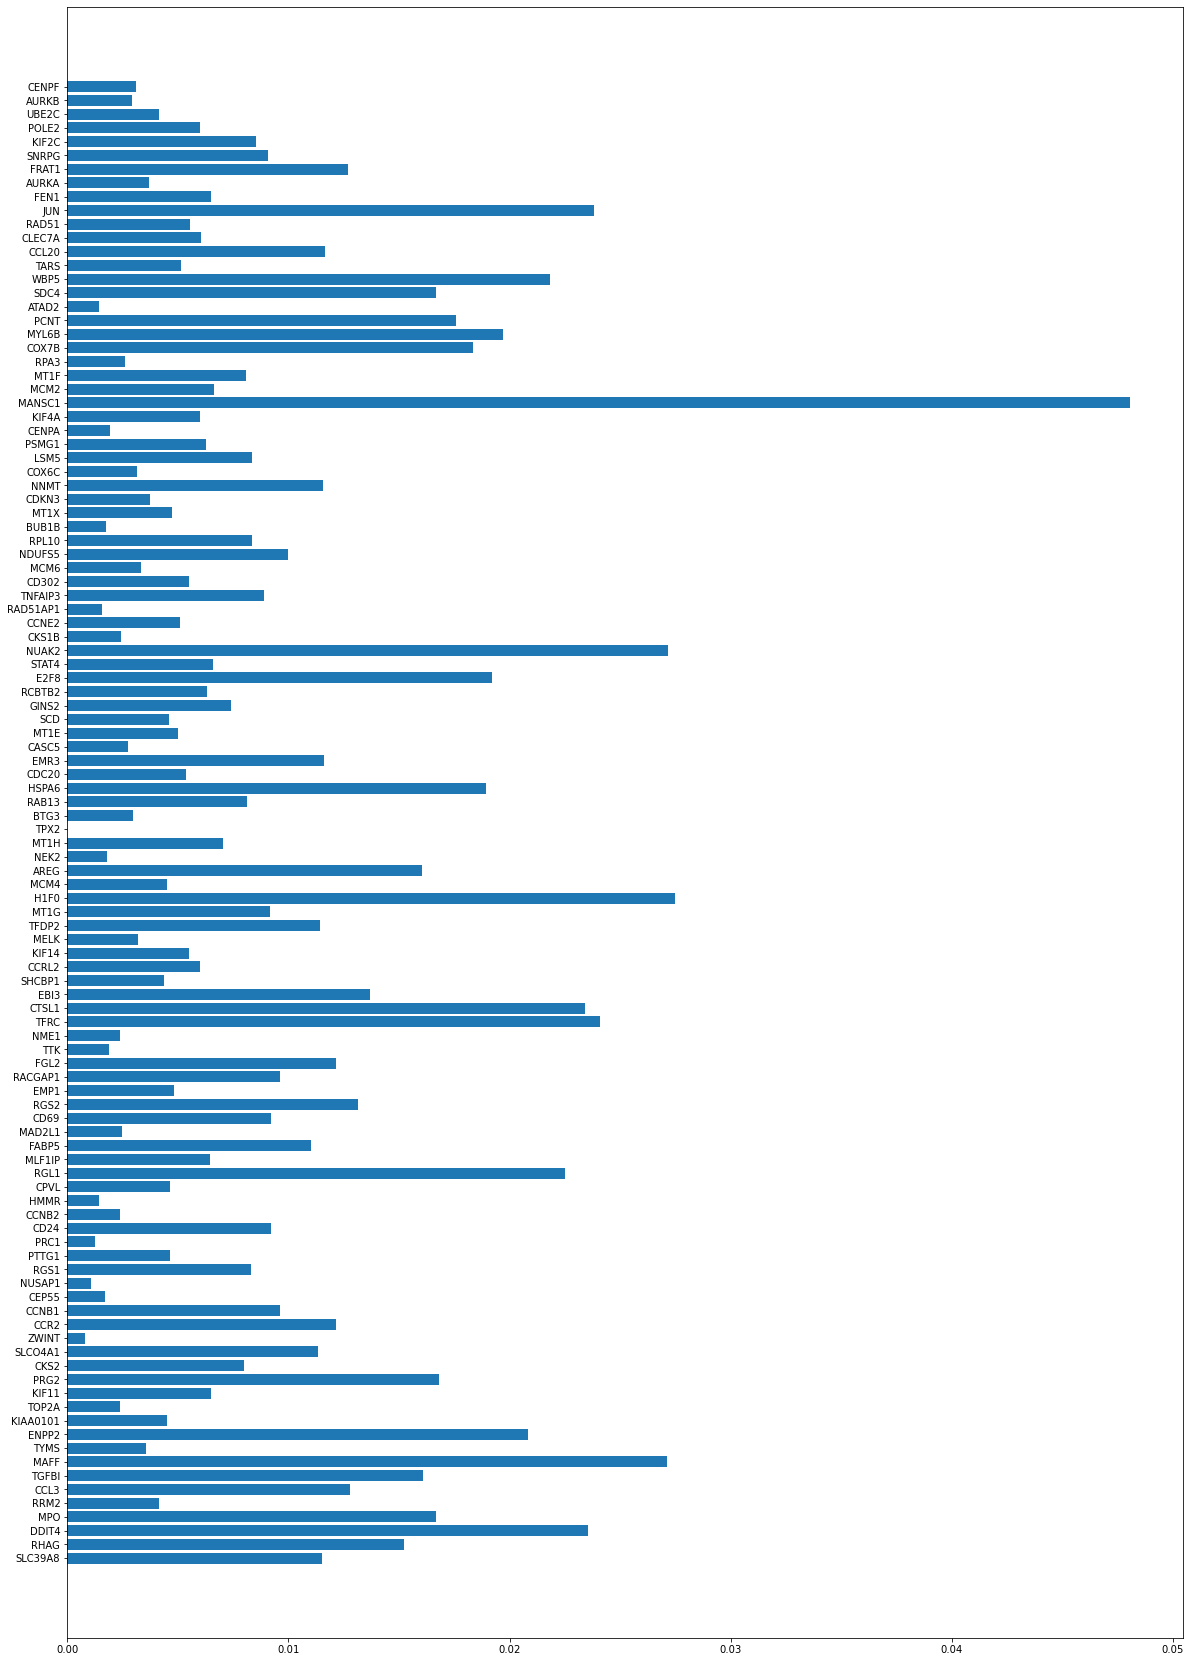

In [8]:
plt.figure(figsize=(20, 30))
# sort_importances = 

plt.barh(degs_gene_id,rf.feature_importances_)



In [9]:
gene_data = data[sg]
gene_data[:]
gene_data = mm.fit_transform(gene_data,y)
gene_data[:].shape

(199, 35)

In [10]:
# split data
X_train_rfi, X_test_rfi, y_train, y_test = train_test_split(gene_data, y, test_size = 0.2, random_state=12314,
                                                   shuffle=True, stratify=y)

Logistic Regression: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.91666667 0.375      1.         0.58489765 0.76682692]
Logistic Regression 2: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.67788462]
RF 100: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.9        0.25       1.         0.47343208 0.80649038]
RF 50: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.88333333 0.125      1.         0.3319179  0.80649038]
SVM Linear: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.125      0.98076923 0.20029819 0.76201923]
SVM RBF: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.88333333 0.125      1.         0.3319179  0.75480769]
KNN-11 nei: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.84735577]
[14:46:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set ev

C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.88333333 0.25       0.98076923 0.35993702 0.80048077]


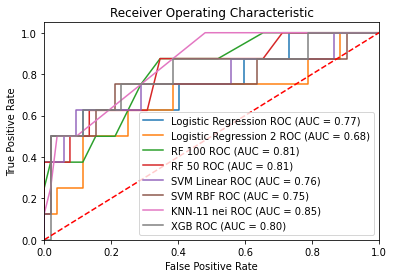

In [14]:
test(X_train_rfi, X_test_rfi, y_train, y_test)

# RFE

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(penalty='l2',random_state=123)

rfe = RFE(estimator=lr, n_features_to_select=10, step=1)
rfe.fit(X_train_rfi, y_train)

RFE(estimator=LogisticRegression(random_state=123), n_features_to_select=10)

In [20]:
rfe.support_

array([ True,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False])

In [21]:
sg[rfe.support_]

0     SLC39A8
1        RHAG
2       DDIT4
13       PRG2
15    SLCO4A1
41       EBI3
48       H1F0
89      MYL6B
92       SDC4
93       WBP5
Name: X, dtype: object

In [22]:
X_train_rfe = rfe.transform(X_train_rfi)
X_test_rfe = rfe.transform(X_test_rfi)
pd.DataFrame(X_train_rfe)

,0,1,2,3,4,5,6,7,8,9
0,0.388112,0.697140,0.331746,0.139855,0.045042,0.042400,0.320684,0.416052,0.290522,0.142127
1,0.642539,0.057571,0.567795,0.190979,0.415481,0.093776,0.256774,0.607267,0.141563,0.131826
2,0.410650,0.185932,0.355091,0.044348,0.035538,0.129814,0.406463,0.196377,0.135425,0.191170
3,0.498682,0.137079,0.631313,0.059655,0.170653,0.033073,0.310244,0.371809,0.336345,0.096202
4,0.627178,0.907380,0.682615,0.356657,0.260704,0.229606,0.775834,0.756776,0.478121,0.235721
...,...,...,...,...,...,...,...,...,...,...
134,0.075038,0.303574,0.199618,0.040855,0.093034,0.084406,0.513391,0.229272,0.256544,0.124213
135,0.530795,0.164418,0.553610,0.123039,0.237571,0.043433,0.294723,0.434371,0.141702,0.172955
136,0.254301,0.484013,0.657063,0.179658,0.190952,0.096134,0.344212,0.320551,0.194394,0.373036
137,0.768538,0.260646,0.601675,0.102357,0.396272,0.501427,0.292157,0.314085,0.152508,0.254122


In [23]:
from sklearn.metrics import *
def evaluate(y_probs, y_pred, y_test):
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # mathew correlation coefficients
    mcc = matthews_corrcoef(y_test, y_pred)
 
    auc = roc_auc_score(y_test, y_probs)
    tp = cm[1,1]
    fp = cm[0,1]
    tn = cm[0,0]
    fn = cm[1,0]
    acc = (tn+tp)/(tn+fp+fn+tp)
    ap = tp + fn
    an = tn + fp
    total = ap + an
    # compute sn and sp
    sn = tp/ap
    sp = tn/an

    #calculate AUC score
    return  np.array([acc, sn, sp, mcc, auc])


In [30]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import *
seed = 7
np.random.seed(seed)
def test(X_train, X_test, y_train, y_test):
    models = [
        {
            'label': 'Logistic Regression',
            'model': LogisticRegression(penalty="l2", random_state=0),
        },
        {
            'label': 'SGD',
            'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
        },
        {
            'label' : 'RF 100',
            'model': RandomForestClassifier(n_estimators=50, random_state=0),
        },
        
        {
            'label' : 'SVM Linear',
            'model': SVC(kernel='linear',probability=True),
        },
        ]

    plt.figure(0).clf()

    for m in models:
        model = m['model'] # select the model
        model.fit(X_train, y_train) # train the model
        y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    #     auc = metrics.auc(fpr,tpr)
        score = evaluate(model.predict_proba(X_test)[:,1],y_pred, y_test)
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (m['label'], score[4]))

        print("%s: \nEvaluate score:\nACC\tSn\tSp\tMCC\tAUC\n" % (m['label']), score)
    # # Custom settings for the plot 

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

Logistic Regression: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.74038462]
SGD: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.83413462]
RF 100: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.74759615]
SVM Linear: 
Evaluate score:
ACC	Sn	Sp	MCC	AUC
 [0.86666667 0.         1.         0.         0.78125   ]


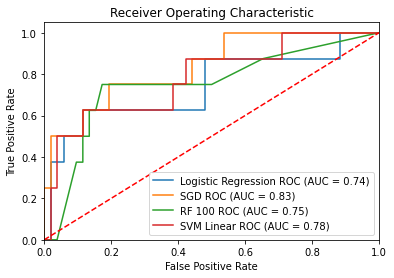

In [31]:
test(X_train_rfe, X_test_rfe, y_train, y_test)

In [26]:
def cross_validation(X, y, model, num_folds=10, random_state=0, n_runs=1, verbose=False, threshold=0.5):
    res = np.zeros(shape=(num_folds * n_runs, 5)) # 5 number of metrics
    base_fpr = np.linspace(0, 1, 51) #add a new parameter for 51
    tprs = []
    
    count = 0
    for cv_run in range(n_runs):
        skf = StratifiedKFold(n_splits=num_folds, random_state=random_state, shuffle=True)
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            train_filtered = X_train
            test_filtered = X_test
            
            model.fit(train_filtered, y_train)
            
            y_prob = model.predict_proba(test_filtered)[:,1]
            y_pred = model.predict(test_filtered)
            
            res[count, :] = evaluate(y_prob, y_pred, y_test)

            fpr, tpr, _ = roc_curve(y_test, y_prob)
            tpr = interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)
            count += 1

    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)

    rVal = {}
    rVal['metrics'] = np.mean(res, axis=0)
    rVal['metrics_std'] = np.std(res, axis=0)
    rVal['fpr'] = base_fpr
    rVal['tpr'] = mean_tprs
    return rVal

<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in

Logistic Regression: [0.90634921 0.35       1.         0.55436229 0.88858696]
Logistic Regression 2: [0.87037037 0.25       0.975      0.27365993 0.85706522]


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in

RF 100: [0.88518519 0.4        0.96666667 0.46955505 0.79782609]


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in

RF 50: [0.90661376 0.55       0.96666667 0.59162228 0.83691123]
SVM Linear: [0.89920635 0.3        1.         0.46008139 0.87173913]


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in

SVM RBF: [0.89920635 0.3        1.         0.51276995 0.74693841]


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in

KNN-11 nei: [0.87037037 0.1        1.         0.13587324 0.80366848]
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1

[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)
C:\Users\vuduc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove 

[14:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: [0.85608466 0.4        0.9326087  0.36807022 0.82762681]


<ipython-input-26-b534109de37b>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr = interp(base_fpr, fpr, tpr)


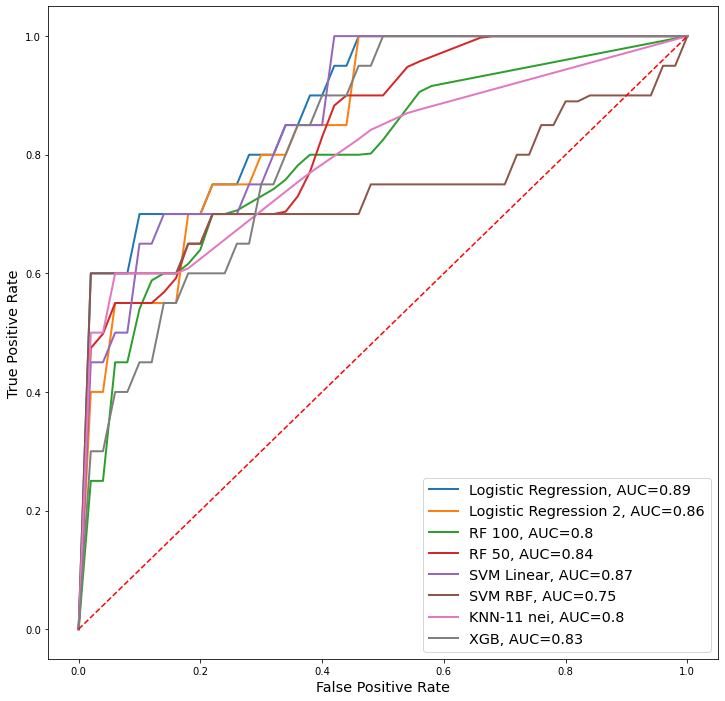

In [29]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import interp
plt.figure(figsize=(12, 12))
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
models = [
        {
            'label': 'Logistic Regression',
            'model': LogisticRegression(penalty="l2", random_state=0),
        },
        {
            'label': 'Logistic Regression 2',
            'model': SGDClassifier(loss="log", penalty="l2", random_state=0),
        },
        {
            'label' : 'RF 100',
            'model': RandomForestClassifier(n_estimators=50, random_state=0),
        },
        {
            'label' : 'RF 50',
            'model': RandomForestClassifier(n_estimators=100, random_state=0),
        },
        {
            'label' : 'SVM Linear',
            'model': SVC(kernel='linear',probability=True),
        },
        {
            'label' : 'SVM RBF',
            'model': SVC(kernel='rbf',probability=True),
        },
        {
            'label' : 'KNN-11 nei',
            'model': KNeighborsClassifier(n_neighbors=11, p=2, n_jobs=-1),
        },
        {
            'label' : 'XGB',
            'model': XGBClassifier(objective="binary:logistic", n_estimators=100, n_jobs=4, random_state=seed),
        }
        ]
for m in models:
    model = m['model']
    num_runs = 5
    res = cross_validation(X_train_rfe, y_train, model, num_folds=5, n_runs=num_runs)
    print('{0}: {1}'.format(m['label'], res['metrics']))
    plt.plot(res['fpr'], res['tpr'], label=m['label']+', AUC='+str(round(res['metrics'][4],2)), linewidth=2)

leg = plt.legend(loc='best', fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.show()